# PROJECT DESCRIPTION 


# IMPACT OF ADVERTISING ON SALES


My name is Safia H. Azungah and I am a second year MBA in Busisness Analysis student graduating in May 2025.

The goal of this project is to analyze the impact of different advertising channels (TV, radio, and newspaper) on product sales,to identify the most effective channels and provide actionable insights to optimize advertising budgets. The analysis will help us understand which marketing channels are driving the highest sales, allowing for better budget allocation and improved returns on advertising investments.

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
import warnings
warnings.filterwarnings(action = 'ignore')

# DATA LOADING

In [3]:
Advertising = pd.read_csv("Advertising.csv")

In [4]:
Advertising.head() 

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
Advertising.T

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Unnamed: 0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,191.0,192.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0,200.0
TV,230.1,44.5,17.2,151.5,180.8,8.7,57.5,120.2,8.6,199.8,...,39.5,75.5,17.2,166.8,149.7,38.2,94.2,177.0,283.6,232.1
radio,37.8,39.3,45.9,41.3,10.8,48.9,32.8,19.6,2.1,2.6,...,41.1,10.8,4.1,42.0,35.6,3.7,4.9,9.3,42.0,8.6
newspaper,69.2,45.1,69.3,58.5,58.4,75.0,23.5,11.6,1.0,21.2,...,5.8,6.0,31.6,3.6,6.0,13.8,8.1,6.4,66.2,8.7
sales,22.1,10.4,9.3,18.5,12.9,7.2,11.8,13.2,4.8,10.6,...,10.8,9.9,5.9,19.6,17.3,7.6,9.7,12.8,25.5,13.4


# EXPLORATORY DATA ANALYSIS

# Sales Distribution

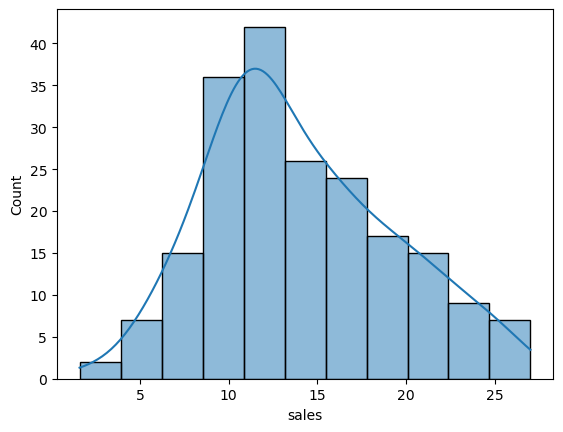

In [6]:
sns.histplot(Advertising['sales'], kde=True)
plt.show()

# 
The histogram shows the distribution of sales, with most sales values concentrated between 10 and 15 units. The shape of the distribution is approximately normal, with a slight skew toward higher sales values, indicating that a few higher sales are less frequent but still present.

# Discriptive Statistics

In [7]:
Advertising.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# 

The summary provides descriptive statistics for the advertising dataset, showing that the mean sales value is 14.02 units, with a standard deviation of 5.22. It also indicates that TV advertising has the highest mean spend ($147k), while newspaper and radio have lower average spends ($30.55k and $23.26k, respectively), and there is wide variation in spending across all channels.

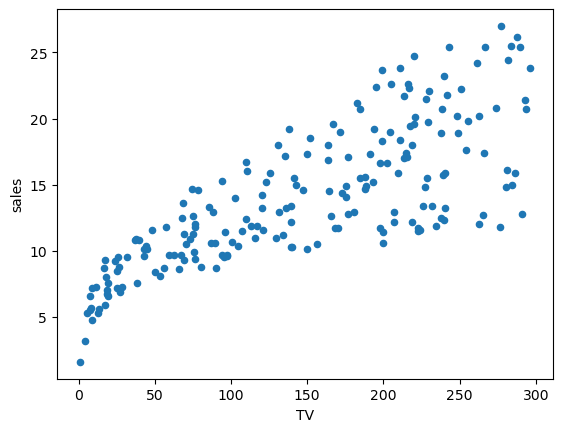

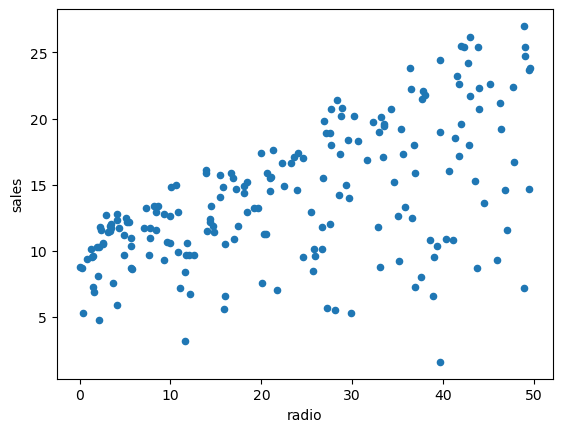

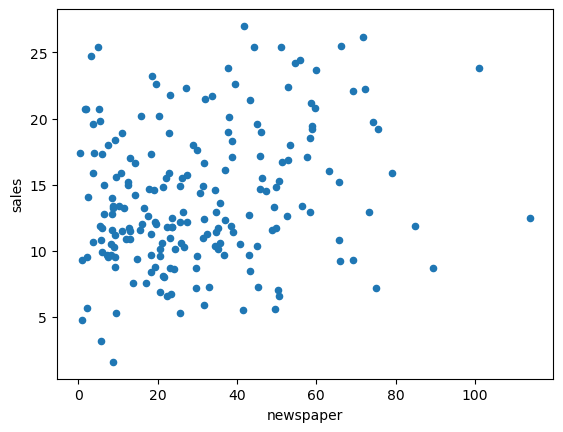

In [8]:
Advertising.plot(kind='scatter', x='TV', y='sales')
Advertising.plot(kind='scatter', x='radio', y='sales')
Advertising.plot(kind='scatter', x='newspaper', y='sales')
plt.show()


# 
The first plot shows a strong positive linear relationship between TV advertising and sales. As the TV advertising budget increases, sales tend to increase as well, indicating that TV ads are a significant driver of sales.

The second plot also shows a positive relationship between radio advertising and sales, though the relationship is slightly more scattered compared to TV. Sales generally increase with higher radio ad spending, but there is more variability.

The third plot shows no clear pattern between newspaper advertising and sales. The points are more scattered, suggesting that spending on newspaper ads has little to no direct correlation with sales.

# Correlation

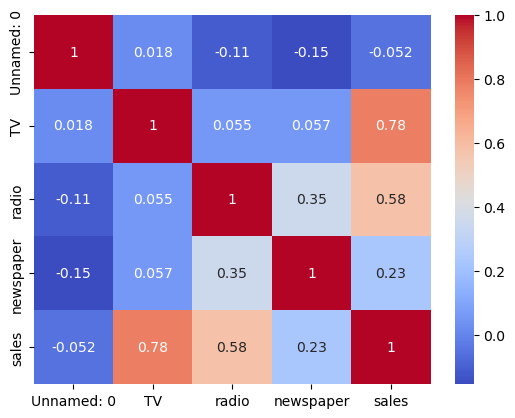

In [9]:
correlation_matrix = Advertising.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# 
There is a strong positive correlation (0.78) between TV advertising and sales, indicating that higher TV ad spending is associated with higher sales. Radio also shows a positive correlation with sales (0.58), but it is weaker than TV. The correlation between newspaper advertising and sales is much weaker (0.23), suggesting that newspaper spending has a less direct impact on sales compared to TV and radio.

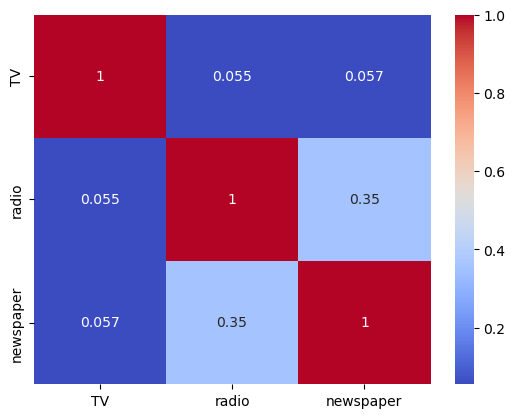

In [10]:
correlation_matrix = Advertising[['TV', 'radio', 'newspaper']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# 
There is a very weak positive correlation(0.055) between TV and radio spending, indicating that companies spending more on TV are not necessarily spending more on radio. There is a moderate positive correlation (0.35) between radio and newspaper spending, suggesting that companies that invest in radio ads are more likely to invest in newspaper ads as well. Similar to TV and radio, the correlation (0.057) between TV and newspaper spending is very weak, indicating little relationship between how companies allocate their budgets between these two channels.

# Scatterplot Matrix

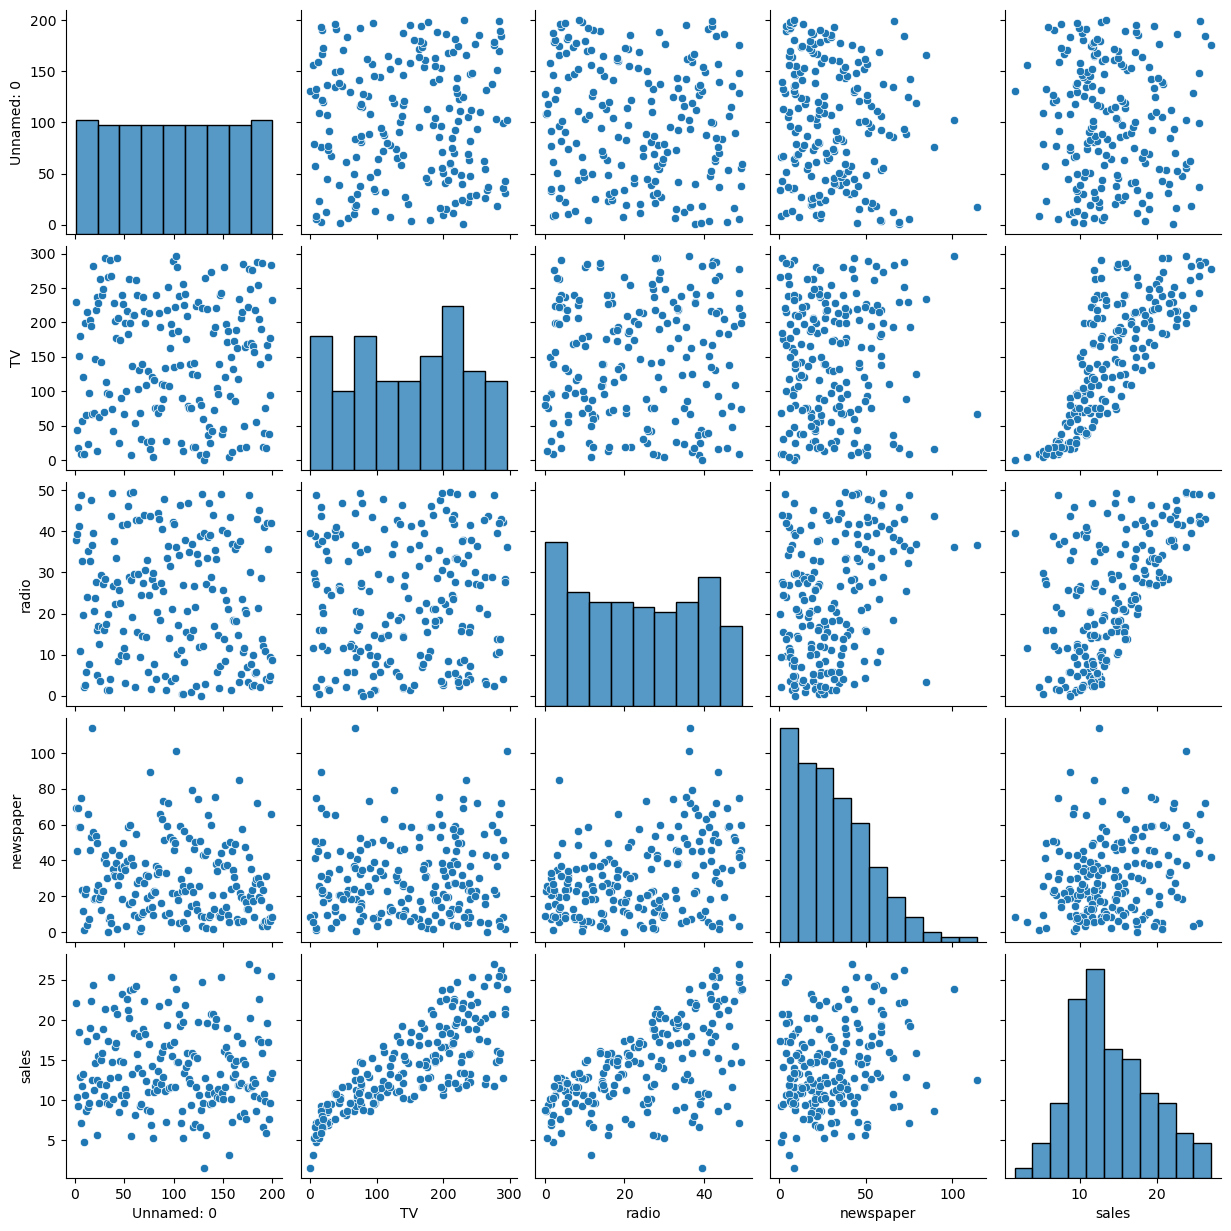

In [11]:
sns.pairplot(Advertising)
plt.show()

# 
The pair plot shows a strong positive linear relationship between TV advertising and sales, indicating that higher TV spending is consistently associated with increased sales. The relationship between radio spending and sales is also positive but more scattered, suggesting greater variability in the impact of radio ads. There is no clear relationship between newspaper spending and sales, as the data points are widely scattered, implying little to no correlation.

# MODEL - MULTIPLE LINEAR REGRESSION

In [12]:
import statsmodels.formula.api as smf
model = smf.ols(formula='sales ~ TV + radio + newspaper', data=Advertising).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           1.58e-96
Time:                        18:40:10   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(Advertising[['TV', 'radio', 'newspaper']])
mse = mean_squared_error(Advertising['sales'], y_pred)
r2 = r2_score(Advertising['sales'], y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}') 

Mean Squared Error: 2.784126314510936
R-squared: 0.8972106381789522


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = Advertising[['TV', 'radio', 'newspaper']]
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
print(vif)

   VIF Factor   features
0    2.486772         TV
1    3.285462      radio
2    3.055245  newspaper


# Model Refinement

In [15]:
model_interaction = smf.ols(formula='sales ~ TV * radio * newspaper', data=Advertising).fit()
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     847.3
Date:                Fri, 11 Oct 2024   Prob (F-statistic):          1.16e-140
Time:                        18:40:10   Log-Likelihood:                -267.45
No. Observations:                 200   AIC:                             550.9
Df Residuals:                     192   BIC:                             577.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.5559      0

In [16]:
model_no_newspaper = smf.ols(formula='sales ~ TV + radio', data=Advertising).fit()
print(model_no_newspaper.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           4.83e-98
Time:                        18:40:10   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model_no_newspaper.predict(Advertising[['TV', 'radio']])
mse = mean_squared_error(Advertising['sales'], y_pred)
r2 = r2_score(Advertising['sales'], y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.784569900338092
R-squared: 0.8971942610828956


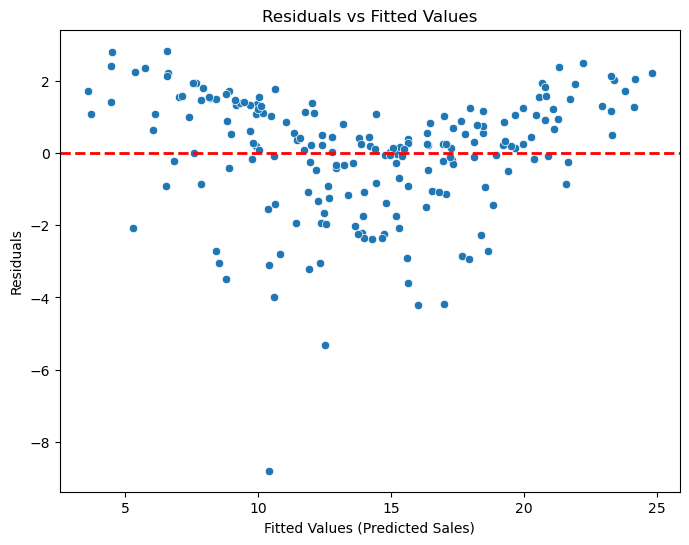

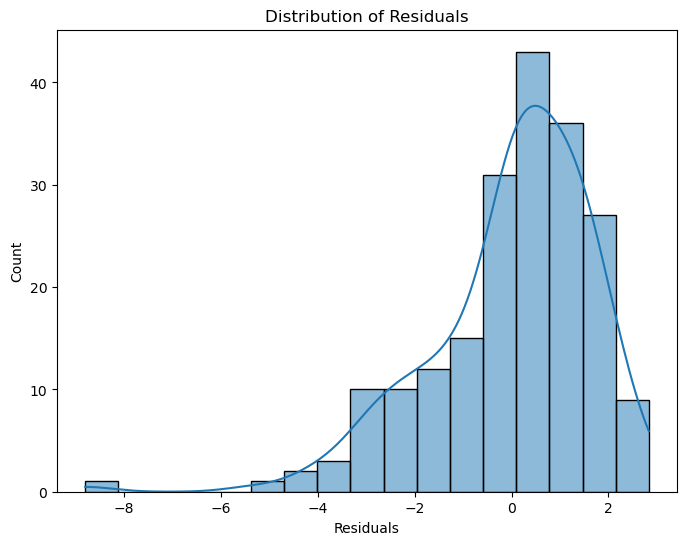

<Figure size 800x600 with 0 Axes>

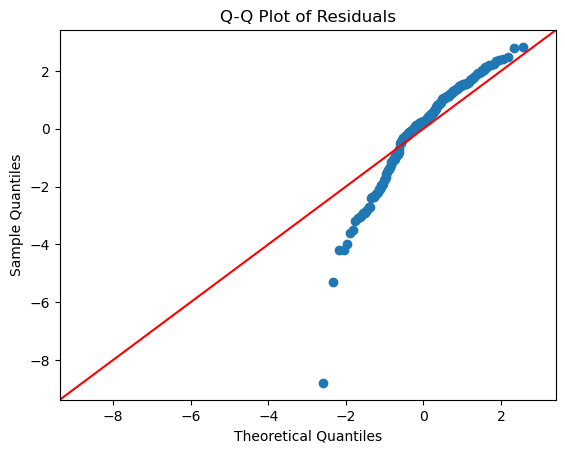

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 1. Calculating residuals
residuals = Advertising['sales'] - y_pred

# 2. Ploting residuals vs fitted values (predictions)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values (Predicted Sales)')
plt.ylabel('Residuals')
plt.show()

# 3. Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

# 4. Q-Q plot for normality check
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()


# Sales Prediction

In [19]:
new_advertising_data = pd.DataFrame({
    'TV': [150, 200, 250],  
    'radio': [30, 40, 50]   
})

predicted_sales = model_no_newspaper.predict(new_advertising_data)
print(predicted_sales)


0    15.424149
1    19.591832
2    23.759515
dtype: float64


In [20]:
coefficients = model.params
print(coefficients)

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64


In [21]:
cost_per_unit_sales = {
    'TV': 1 / coefficients['TV'],
    'radio': 1 / coefficients['radio'],
    'newspaper': 1 / coefficients['newspaper']
}
print(cost_per_unit_sales)


{'TV': 21.85092859453274, 'radio': 5.304195142749389, 'newspaper': -963.8618853898383}


# CONCLUSION 


Based on the analysis, the regression model demonstrates that TV and radio advertising have a significant positive impact on sales, while newspaper advertising does not have a meaningful effect. The model explains 89.7% of the variation in sales, which suggests that TV and radio spending are key drivers of sales performance. Specifically:

For every 1,000 dollars spent on TV advertising,sales increase by approximately 0.0458 units and for every 1,000 dollars spent on radio advertising, sales increase by approximately 0.1885 units.

Spending on newspaper advertising does not significantly impact sales, as shown by its near-zero coefficient and high p-value.

The model performs well, with a high R-squared and adjusted R-squared, indicating a strong fit. However, the non-normality of residuals might suggest some outliers or other factors not captured by the model.


# Recommendations

Prioritize TV and Radio Advertising. Given the significant positive impact of TV and radio on sales, the company should focus its advertising budget on these two channels. Radio appears to have a stronger marginal effect, so a larger portion of the budget might be allocated to radio, while still maintaining a substantial investment in TV advertising.

By focusing on the most effective channels (TV and radio), reallocating funds from newspaper advertising, and potentially optimizing the budget allocation, the company can maximize its sales returns from its advertising spend.